# <center>Final Project</center> #
## <center>Stock Prediction with LSTM and Simple RNN </center> ##
####  107061112 王昊文, 107061212 劉亦傑
***

### Implementation
* 我們這組的project主要是想利用本學期所學的東西，來去實作「股價預測」的功能，因為是要預測連續性的資料，所以設計上將主要使用LSTM和RNN這類的model進行實作
* Datasets的部分，我們這組的做法是從yahoo finance的網站上去下載資料(.csv)，我們的model並沒有限制使用的地區，因此無論是台股(2330台積電)、美股(AAPL, S&P500)都能正常運作
* 而features的部分，dataset的每一個sample都會具有以下這六個feature: 
    * 日期(Date)、開盤價(Open)、最高價(High)、最低價(Low)、收盤價(Close)、調整後之收盤價(Adj Close)、成交量(Volume)
    * 但要注意到日期在訓練的時候，是不會被當成訓練資料的一部分！
* 以下將整理本次Final Project的整個流程
    * 首先，先利用pandas把資料讀進來，並觀察看看資料的特性、基本資料
    * 第二步，利用 **mplfinance** 的套件來畫出大家熟知的candle stick圖，而這圖可以讓我們先大致了解data的狀況
    * 進一步去觀察說，像是有沒有突然暴漲、暴跌等現象，可以先了解狀況後再去進行訓練
    * 一開始把資料處理好，然後測試看看LSTM跟RNN的效果差異，以及比較訓練所花的時間(training time)等等 (**兩者效果差異將會在discussion & conclusion處討論**)
    * 股價預測的部分，我們利用0~N筆資料，來去預測N+1天的股價，而這個N是可以調整的(e.g. 10天, 30天, 60天)，**並一步步平移來畫出我們想要的股價預測圖**
    * 進行訓練的時候，由於股價預測有太多東西，因此會嘗試僅使用收盤價(Close)訓練model，以及嘗試把所有features(共6種)都丟下去training，比較兩者的差異
    * 而更進一步，我們想知道說除了正常交易的股票外，某些極端走勢的股票是否也能維持不錯的預測能力
    * 然後，我們嘗試比較特別的，看能不能利用預測的資料來餵進去(feedback)預測，看看效果如何
    * 另外，除了使用0~N筆資料去預測第N+1天，基於好奇心來去試試是否能用前N筆資料去預測第N+5天，並與Test set對照
* 接著，為了方便起見，我們會將各個功能拆分成function來實作，這樣後面在嘗試各種不同的預測、方法時就能直接call來使用
* 先定義第一個function，我們會拿來設定train size，以及要使用幾種features來訓練我們的model(只有收盤價(Close)或是全用(All))
* 然後，定義normalization的function，由於LSTM和RNN的容易受到scale影響，因此我們決定採用MinMaxScaler來去normalize我們的dataset
* 要特別注意到，這個function我們除了被處理的dataset以外，還有另外把MinMaxScaler供後面使用
* 接著便是去定義幾個有關dataset的function，方便我們在後續的各種變形嘗試中比較好利用
    * build_dataset: 根據我們是要只使用收盤價，還是全部features都使用來處理dataset來切得 training set, validation set (**此function包含重要的time_step, future參數供調整**)
    * visualize_train_val: 把train, valid, test分別著色並畫出來
    * build_test: 與build_dataset類似，但這邊僅處理test set的部分 (**此function包含重要的time_step, future參數供調整**)

* 先使用最單純的RNN搭配只有收盤價的feature來進行model訓練
* 接著嘗試LSTM的效果(**兩者效果差異將會在discussion & conclusion處討論**)
* 模型的概念是採用Many to one的架構，利用固定的一串sequence去預測下一天的股價
* 而無論是哪種模型，我們的設計會有一項 **time_step** 參數，這參數代表的意義是你要給定過去多少天的資料來給予模型訓練，而之後我們還會加上 **future** 參數，其功能代表說你要預測幾天後的結果
* 而只使用收盤價的效果，趨勢有預測出來，但實際上的絕對價格有一點落差，因此我們猜測可能是feature提供的資訊不夠所導致
* 第二步，試著利用全部的feature下去進行訓練，會發現訓練出來的股價與ground truth差距更小了！
<br><br>
* 再來，使用看看最近很紅的護國神積 **2330台積電** ，作為我們的dataset來源，因為最近上漲的十分誇張，很適合拿來當作「**股票暴漲**」的案例
* 把資料用visualize的function畫出來後，可以發現到training和testing有相當的不一樣，因此蠻適合來測試我們model的穩定度，究竟是否能在這種情況下依舊順利預測股價
* 然後，除了暴漲的股票外，我們嘗試看看一些公司營運不良導致股價暴跌的案例，此處選擇2929淘帝-KY作為我們的dataset來源，因為最近公司涉嫌作假帳風波，很適合拿來當作「**股票暴跌**」的案例
<br>
* 上述是使用0~N筆資料去預測第N+1天的方法，接著讓我們嘗試看看改成預測N+5來看看效果如何，為了避免其他因素這邊就挑選比較穩定的股票來討論
* 調整方式就是在build_dataset的時候給定future參數來決定
* 而根據前面的實作，我們決定直接使用all features來做預測，如此一來理論上可以達到更準確的結果
* 要注意，test的時候也需要去修改future參數來對應training時設定的future
* 雖然價格偏離了原始資料很多，我們可以發現預測更久遠之後的事情，我們的Model線條變得更加平滑，這跟LSTM本身的特性有關
* 我們可以合理的推測LSTM推測更久遠之後的Data應該會更不準，但是趨勢大致上都符合真實股價
* 至於它預測的價錢比實際低跟我們的模型所學習的價位有關，model本身沒有考慮公司的**營運成長**造成的股價上漲，但能抓到大概趨勢，因此我們可以推論股票市場流行的技術分析很適合拿來判斷趨勢！
<br>

* 最後，我們嘗試使用自己產生的資料再餵進去我們的Model(也就是當作test set)，看看效果如何
* 但由於我們的Model只會產生收盤價，因此需要將Model改成只有收盤價(Close)的版本來訓練。理論上這樣的方法是不可行的，LSTM必須使用現有資料當作input，然而出於好奇心，我們想觀察這樣的效果到底如何，或許能夠發現生成股價資料的可能性
* 但不幸地，我們最後預測股價變成一條直線，看來這樣的方法似乎行不通，但這也驗證了實務上使用LSTM來生成資料是不可行的，通常得動用到GAN的技巧才會是比較可靠的方法，此處我們也算是驗證了這一點現象

### Our achitecture
There are various architectires of RNN, we choose many to one.

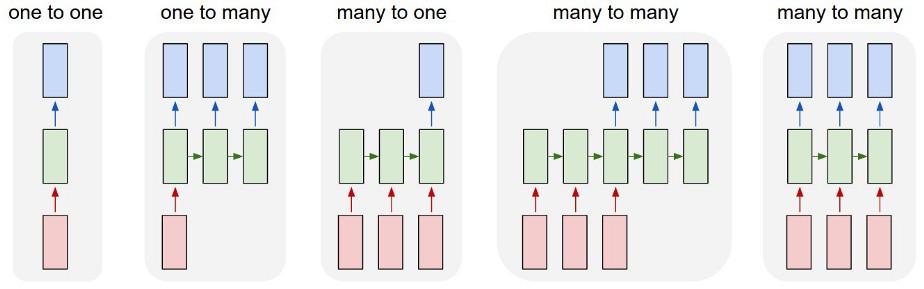

In [2]:
from IPython.display import Image
Image(filename='138222343_474459400617266_4161490160671964278_n.png', width=500)


Our data building

In [ ]:
Image(filename='139363679_164514925430251_3108014894021174622_n.png', width=500)


### <font color="purple">Import neccessary libraries<font>

In [1]:
import math
import copy
import time
import matplotlib.pyplot as plt
import keras
import mplfinance as fplt
import pandas as pd
import numpy as np
from datetime import datetime

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
print("All libraries imported!")

All libraries imported!


### <font color="purple">Read in the data with pandas. Change the ticker over here, also we copy in order to visualize our data<font>


In [2]:
# Change the ticker here
ticker = '9911.TW'
# Read two different formats in order to visulize
df = pd.read_csv(ticker + ".csv")
df = df.dropna()

# Transfer string into datetime object
# remember import datetime.datetime!!
df_plot = copy.deepcopy(df)
df_plot['Date'] = df_plot['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df_plot = df_plot.set_index('Date')

print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1218, 7)


Date     Open     High      Low    Close  Adj Close    Volume
0  2016-01-18  21.6875  22.1875  21.2500  22.1875  16.802080  368000.0
1  2016-01-19  22.2500  22.2500  21.8125  22.2500  16.849407  157600.0
2  2016-01-20  22.3750  22.3750  21.8750  22.0000  16.660089  276000.0
3  2016-01-21  22.0000  22.3125  21.9375  21.9375  16.612761  305600.0
4  2016-01-22  22.0625  22.2500  21.9375  22.0625  16.707420  228000.0

In [3]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  1218.000000  1218.000000  1218.000000  1218.000000  1218.000000   
mean     39.991595    40.334688    39.634729    39.979105    35.160404   
std       6.563326     6.596297     6.512248     6.567755     8.491056   
min      21.687500    22.187500    21.250000    21.937500    16.612761   
25%      36.262500    36.500000    36.000000    36.200001    30.261518   
50%      39.000000    39.225001    38.700001    38.975001    33.366472   
75%      45.799999    46.349998    45.618749    46.037499    43.056740   
max      53.900002    54.799999    53.099998    53.900002    53.900002   

             Volume  
count  1.218000e+03  
mean   6.269236e+05  
std    1.004854e+06  
min    0.000000e+00  
25%    1.868890e+05  
50%    3.130500e+05  
75%    6.070665e+05  
max    1.420880e+07

### <font color="purple">Candlestick visualization<font>

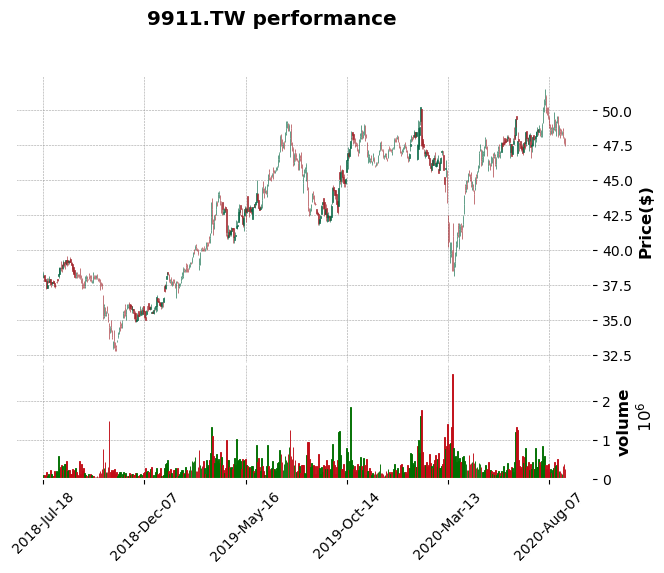

In [4]:
# You can choose the dates here
range_my = pd.date_range(start="2018-07-18", end="2020-08-31")
df_plot = df_plot[df_plot.index.isin(range_my)]
# You can customize the style here
mc = fplt.make_marketcolors(
    up='tab:red', down='tab:green',
    edge='lime',
)
s = fplt.make_mpf_style(marketcolors=mc)

# plot the candle plot
fplt.plot(
    df_plot,
    type = 'candle',
    style='charles',
    title=ticker+' performance',
    ylabel='Price($)',
    volume=True,
    ylabel_lower='volume'
)

## <font color="purple">Define some frequently used functions<font>

In [5]:
col_idx = []
for i in range(len(df.columns)):
    col_idx.append(df.columns[i])
print('Observe columns of our dataset: ', col_idx)

Observe columns of our dataset:  ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


### <font color="purple">Define training and testing set size and used feature(Close or All)<font>
#### <font color="purple">This function will help you seperate training data and testing data.<font>

In [6]:
def split_train_test(train_size=800, feature="Close"):
    if feature == 'Close':
        training_set = df.iloc[:train_size, 4:5].values
        test_set = df.iloc[train_size:, 4:5].values
        return training_set, test_set
    # Use all the features
    elif feature == "All":
        training_set = df.iloc[:train_size, 1:].values
        test_set = df.iloc[train_size:, 1:].values
        return training_set, test_set
    else:
        raise 'error'
print('Define how many features to use and train size!')

Define how many features to use and train size!


### <font color="purple">Data normalization<font>
#### <font color="purple">LSTM and various RNN model are sensitive to scale, this function will help to scale training set to be between 0 and 1, and it will return the MinMaxscaler for inverse transform later.<font>

In [7]:
def normalize(training_set):
    sc = MinMaxScaler(feature_range=(0, 1))
    training_set_scaled = sc.fit_transform(training_set)
    return sc, training_set_scaled
print('Define normalization function for our data')

Define normalization function for our data


### <font color="purple">Building the dataset and split to training and validation<font>

In [8]:
def build_dataset(training_set_scaled, val_size=0.2, time_step=60, future=0, feature='Close'):
    X_train = []
    y_train = []
    if feature == 'All':
        for i in range(time_step, len(training_set_scaled) - future):
            X_train.append(training_set_scaled[i-time_step:i])
            y_train.append(training_set_scaled[i+future, 3])
        X_train, y_train = np.array(X_train), np.array(y_train)
        print(X_train.shape)
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], -1))
        # y_train = np.reshape(y_train, (y_train.shape[0], y_train.reshape[1], -1))
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size)
        return X_train, X_val, y_train, y_val
    elif feature == 'Close':
        for i in range(time_step, len(training_set_scaled) - future):
            X_train.append(training_set_scaled[i-time_step:i, 0])
            y_train.append(training_set_scaled[i+future, 0])
        X_train, y_train = np.array(X_train), np.array(y_train)
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size)
        return X_train, X_val, y_train, y_val
    else:
        raise 'error'
print('Define build function for our dataset')

Define build function for our dataset


### <font color="purple">Visualize the split<font>

In [9]:
def visualize_train_val(X_train, X_val, y_train, y_val, training_set, test_set):
    a = X_train.shape[0]
    b = X_train.shape[0] + X_val.shape[0]
    c = X_train.shape[0] + X_val.shape[0] + test_set.shape[0]
    print(c)
    plt.figure(figsize=(15, 5))
    plt.plot(np.arange(a+60), training_set[:a+60], color='blue', label='train target')
    plt.plot(np.arange(a, b+60),training_set[a:b+60], color = 'red', label='val target' )

    plt.plot(np.arange(b+60, c+60), test_set ,color='black', label='test target')
    plt.title('Past and future stock prices')
    plt.xlabel('time [days]')
    plt.ylabel('price')
    plt.legend(loc='best')
    plt.show()

### <font color="purple">A function to build the testing set<font>
### <font color="purple">We also need a function to create our test set!<font>

In [10]:
def build_test(time_step=60, future=0, train_size=800, feature='Close'):
    if feature == 'Close':
        dataset_train = df.iloc[:800, 4:5]
        dataset_test = df.iloc[800:, 4:5]
        dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
        inputs = dataset_total[len(dataset_total) - len(dataset_test) - time_step - future:].values
        inputs = inputs.reshape(-1,1)
        inputs = sc.transform(inputs)
        X_test = []
        for i in range(time_step, len(inputs) - future):
            X_test.append(inputs[i-time_step:i, 0])
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        return X_test
    elif feature == 'All':
        dataset_train = df.iloc[:800, 1:]
        dataset_test = df.iloc[800:, 1:]
        dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
        inputs = dataset_total[len(dataset_total) - len(dataset_test) - time_step - future:].values
        # inputs = inputs.reshape(-1,1)
        inputs = sc.transform(inputs)
        X_test = []
        for i in range(time_step, len(inputs) - future):
            X_test.append(inputs[i-time_step:i])
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))
        return X_test
    else:
        raise 'error'


## <font color="purple">Simple RNN with "Close" price<font>

In [11]:
print("Number of datas in our dataset", df.shape[0])

Number of datas in our dataset 1218


In [12]:
# Split original dataset into training and testing
training_set, test_set = split_train_test(train_size=800, feature='Close')

# Normalize our data
sc, training_set_scaled = normalize(training_set)

# Build our dataset
X_train, X_val, y_train, y_val = build_dataset(training_set_scaled, time_step=60, feature='Close')
X_train.shape, X_val.shape, y_train.shape, y_val.shape, test_set.shape
# training_set[592+148+59]

((592, 60, 1), (148, 60, 1), (592,), (148,), (418, 1))

1158


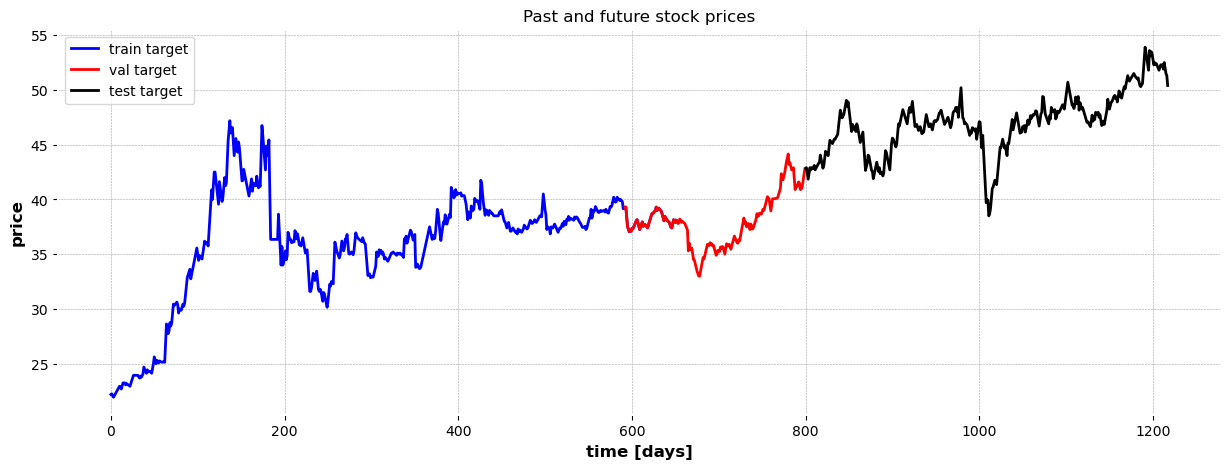

In [13]:
visualize_train_val(X_train, X_val, y_train, y_val, training_set, test_set)

### <font color="purple">Build the RNN model<font>

In [14]:
model = Sequential()#Adding the first SimpleRNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))# Adding a second SimpleRNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a third SimpleRNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a fourth SimpleRNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))# Adding the output layer
model.add(Dense(units = 1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 60, 50)            2600      
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 60, 50)            5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 60, 50)            5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 50)                5

### <font color="purple">Training and draw the learning curve<font>

In [15]:
# Compiling the RNN
start = time.time()
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose=1, validation_data=(X_val,y_val))
end = time.time()

Epoch 1/100
19/19 [==============================] - 2s 89ms/step - loss: 0.4605 - val_loss: 0.0214
Epoch 2/100
19/19 [==============================] - 1s 72ms/step - loss: 0.3477 - val_loss: 0.0094
Epoch 3/100
19/19 [==============================] - 1s 71ms/step - loss: 0.3068 - val_loss: 0.0220
Epoch 4/100
19/19 [==============================] - 1s 72ms/step - loss: 0.2394 - val_loss: 0.0081
Epoch 5/100
19/19 [==============================] - 1s 73ms/step - loss: 0.2251 - val_loss: 0.0152
Epoch 6/100
19/19 [==============================] - 1s 70ms/step - loss: 0.1969 - val_loss: 0.0134
Epoch 7/100
19/19 [==============================] - 1s 72ms/step - loss: 0.1752 - val_loss: 0.0103
Epoch 8/100
19/19 [==============================] - 1s 71ms/step - loss: 0.1429 - val_loss: 0.0115
Epoch 9/100
19/19 [==============================] - 1s 72ms/step - loss: 0.1451 - val_loss: 0.0267
Epoch 10/100
19/19 [==============================] - 1s 74ms/step - loss: 0.1372 - val_loss: 0.0047

### <font color="purple">Print training time and draw learning curve<font>

In [16]:
rnn_time = end - start
print("It took the rnn", rnn_time, "second to train")

It took the rnn 145.19689106941223 second to train


Text(0.5, 1.0, 'Training - Loss Function')

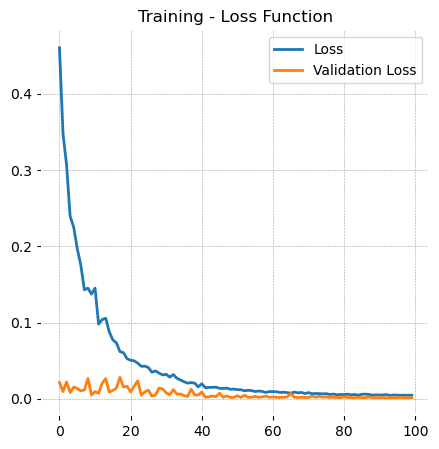

In [17]:
plt.figure(figsize=(5, 5))

plt.subplot()
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

In [18]:
X_test = build_test(feature='Close', train_size=800, time_step=60)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price.shape


(418, 1)

### <font color="purple">Visualizing the results<font>

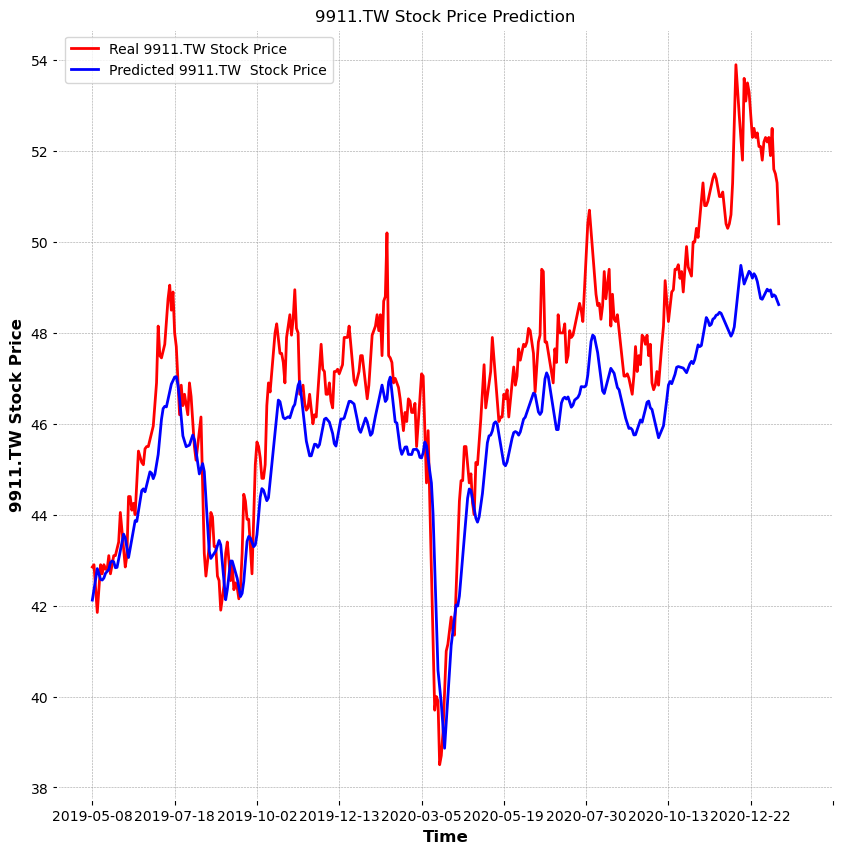

In [19]:
# Visualising the results
plt.figure(figsize=(10, 10))
plt.plot(df.loc[805:, "Date"],df.iloc[800:, 4:5].values, color ="red", label="Real " + ticker + " Stock Price")
plt.plot(df.loc[805:, "Date"],predicted_stock_price, color="blue", label="Predicted " + ticker + "  Stock Price")

plt.xticks(np.arange(0,459,50))
plt.title(ticker+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(ticker+' Stock Price')
plt.legend()
plt.show()

### <font color="purple">Try LSTM instead<font>

In [20]:
model = Sequential()#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))# Adding the output layer
model.add(Dense(units = 1))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)               

In [21]:
start = time.time()
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose=1, validation_data=(X_val,y_val))
end = time.time()

Epoch 1/100
19/19 [==============================] - 1s 52ms/step - loss: 0.0791 - val_loss: 0.0078
Epoch 2/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0142 - val_loss: 0.0075
Epoch 3/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0126 - val_loss: 0.0067
Epoch 4/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0099 - val_loss: 0.0063
Epoch 5/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0093 - val_loss: 0.0059
Epoch 6/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0098 - val_loss: 0.0056
Epoch 7/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0088 - val_loss: 0.0057
Epoch 8/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0098 - val_loss: 0.0053
Epoch 9/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0092 - val_loss: 0.0057
Epoch 10/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0077 - val_loss: 0.0056

In [22]:
lstm_time = end - start
print("It took the lstm", lstm_time, "seconds to train")

It took the lstm 30.217405319213867 seconds to train


Text(0.5, 1.0, 'Training - Loss Function')

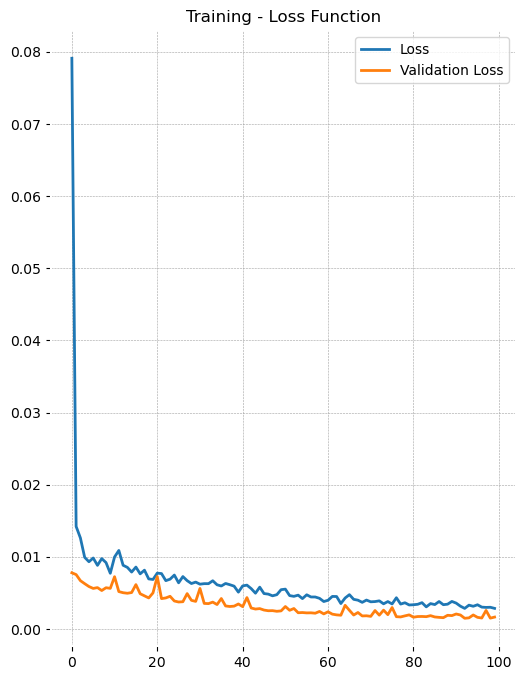

In [23]:
plt.figure(figsize=(6, 8))

plt.subplot()
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

In [24]:
X_test = build_test(feature='Close', train_size=800, time_step=60)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price.shape

(418, 1)

### <font color="purple">Visualizing the results<font>

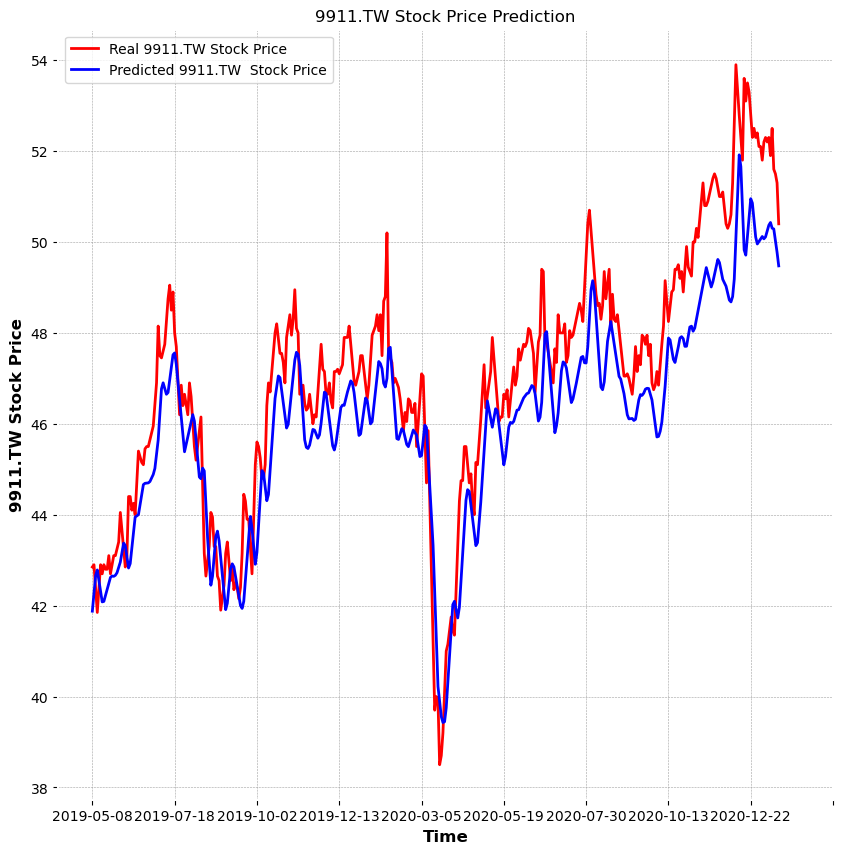

In [25]:
# Visualising the results
plt.figure(figsize=(10, 10))
plt.plot(df.loc[805:, "Date"],df.iloc[800:, 4:5].values, color ="red", label="Real " + ticker + " Stock Price")
plt.plot(df.loc[805:, "Date"],predicted_stock_price, color="blue", label="Predicted " + ticker + "  Stock Price")

plt.xticks(np.arange(0,459,50))
plt.title(ticker+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(ticker+' Stock Price')
plt.legend()
plt.show()

我們可以看到預測結果與使用RNN的時候表現差不多，預測結果算是相當不錯，然而預測的價格都與真實值相比稍微偏低，但比較來看，LSTM更加貼近真實價格。我們接著看看Training時間。

In [26]:
print("It took the RNN", rnn_time, "seconds to train")
print("It took the LSTM", lstm_time, "seconds to train")

It took the RNN 145.19689106941223 seconds to train
It took the LSTM 30.217405319213867 seconds to train


### <font color="purple">LSTM has better perfomance (both time and accuracy)under the same architecture<font>


### <font color="purple">Then, use ALL features as our input!<font>


In [27]:
training_set, test_set = split_train_test(train_size=800, feature='All')
# Normalize our data
sc, training_set_scaled = normalize(training_set)
X_train, X_val, y_train, y_val = build_dataset(training_set_scaled, time_step=60, feature='All')
X_train.shape, X_val.shape, y_train.shape, y_val.shape, test_set.shape

(740, 60, 6)


((592, 60, 6), (148, 60, 6), (592,), (148,), (418, 6))

我們依然與上一題使用一樣的配置，將Training size設為800，剩餘的為Testing。我們可以看到我們資料的X的shape在第三維度不是一了，代表我們的input feature不在只是價錢而已。

### <font color="purple">Build a model to train with multiple feature with LSTM model<font>

In [28]:
model = Sequential()#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))# Adding the output layer
model.add(Dense(units = 1))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            11400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

In [29]:
# Compiling the RNN
start = time.time()
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose=1, validation_data=(X_val,y_val))
end = time.time()

Epoch 1/100
19/19 [==============================] - 1s 53ms/step - loss: 0.0647 - val_loss: 0.0126
Epoch 2/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0143 - val_loss: 0.0071
Epoch 3/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0110 - val_loss: 0.0080
Epoch 4/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0118 - val_loss: 0.0063
Epoch 5/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0101 - val_loss: 0.0061
Epoch 6/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0085 - val_loss: 0.0065
Epoch 7/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0079 - val_loss: 0.0066
Epoch 8/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 9/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0077 - val_loss: 0.0063
Epoch 10/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0076 - val_loss: 0.0047

### <font color="purple">Print training time and learning curve<font>

In [30]:
lstm_time = end - start
print("It took the lstm", lstm_time, "second to train")

It took the lstm 30.301090717315674 second to train


Text(0.5, 1.0, 'Training - Loss Function')

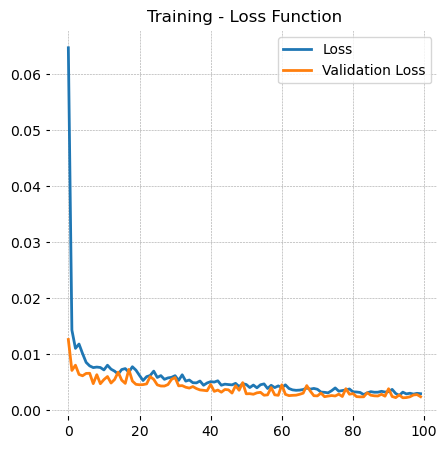

In [31]:

plt.figure(figsize=(5, 5))

plt.subplot()
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

### <font color="purple">Build the test set for testing<font>

In [32]:
X_test = build_test(feature='All', train_size=800, time_step=60)
predicted_stock_price = model.predict(X_test)
# create a minmax scaler to transform our stock prices back
# The original minmax scaler is 7 dimension, but we only need to transform the price
price_min_max = MinMaxScaler(feature_range=(0,1))
price_min_max.fit_transform(df.iloc[:800, 4:5].values)
predicted_stock_price = price_min_max.inverse_transform(predicted_stock_price)
predicted_stock_price.shape


(418, 1)


### <font color="purple">Visualizing the results<font>

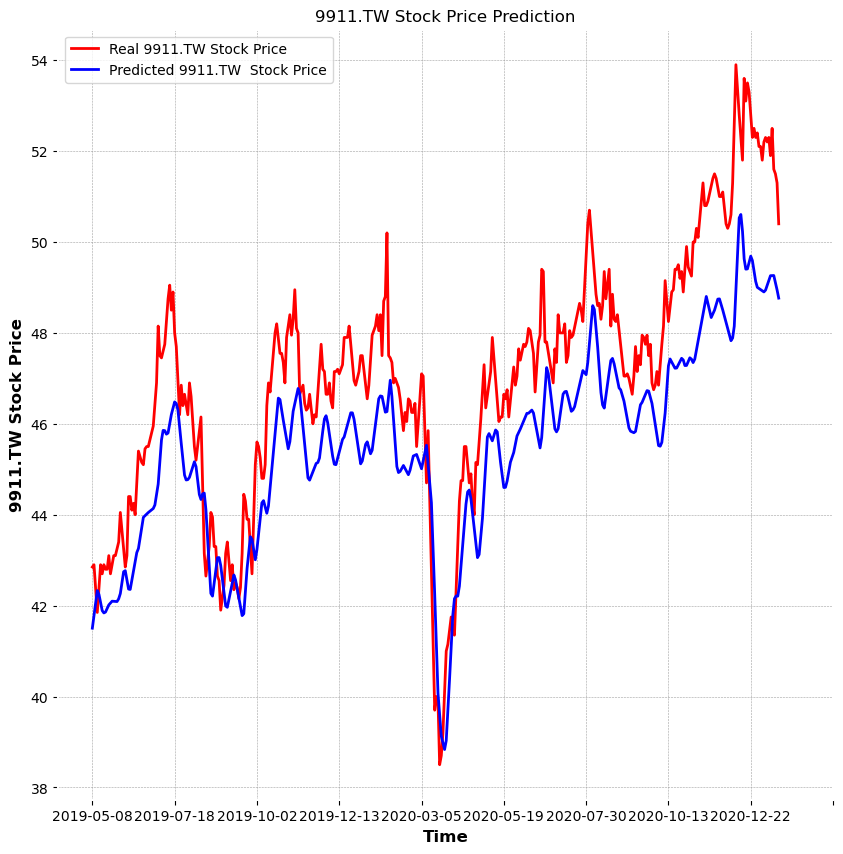

In [33]:
# Visualising the results
plt.figure(figsize=(10, 10))
plt.plot(df.loc[805:, "Date"],df.iloc[800:, 4:5].values, color ="red", label="Real " + ticker + " Stock Price")
plt.plot(df.loc[805:, "Date"],predicted_stock_price, color="blue", label="Predicted " + ticker + "  Stock Price")

plt.xticks(np.arange(0,459,50))
plt.title(ticker+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(ticker+' Stock Price')
plt.legend()
plt.show()

### <font color="purple">Use other stock and use "all features" to train a LSTM model<font>


In [34]:
# Change the ticker here
ticker = '2330.TW'
# Read two different formats in order to visulize
df = pd.read_csv(ticker + ".csv")
df = df.dropna()
# Transfer string into datetime object
# remember import datetime.datetime!!
df_plot = copy.deepcopy(df)
df_plot['Date'] = df_plot['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df_plot = df_plot.set_index('Date')

print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1218, 7)


Date   Open   High    Low  Close   Adj Close      Volume
0  2016-01-18  135.0  138.0  134.5  137.0  114.137489  36757000.0
1  2016-01-19  137.5  138.0  136.0  138.0  114.970581  23737000.0
2  2016-01-20  137.5  137.5  133.5  134.5  112.054672  43839000.0
3  2016-01-21  134.0  136.5  134.0  135.0  112.471230  31933000.0
4  2016-01-22  136.5  138.5  136.0  138.5  115.387154  33889000.0

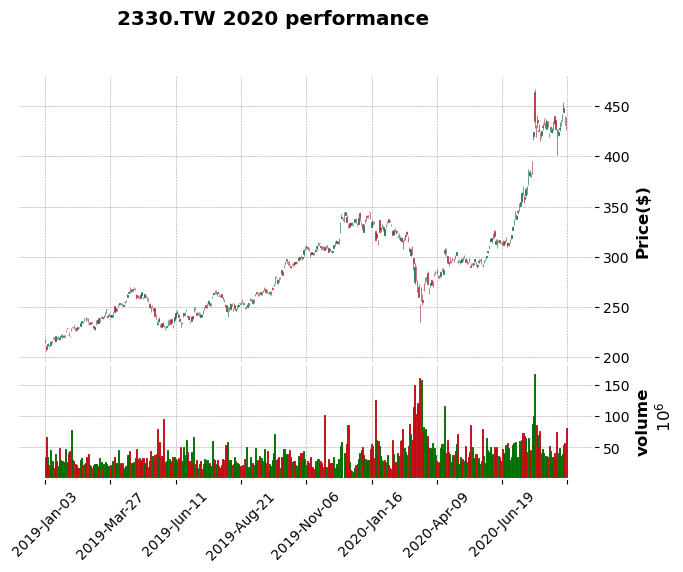

In [35]:
# You can choose the dates here
range_my = pd.date_range(start="2019-01-03", end="2020-08-31")
df_plot = df_plot[df_plot.index.isin(range_my)]
# You can customize the style here
mc = fplt.make_marketcolors(
    up='tab:red', down='tab:green',
    edge='lime',
)
s = fplt.make_mpf_style(marketcolors=mc)

# plot the plot
fplt.plot(
    df_plot,
    type = 'candle',
    style='charles',
    title=ticker+' 2020 performance',
    ylabel='Price($)',
    volume=True,
    ylabel_lower='volume'
)

In [36]:
print("Number of datas in our dataset:", df.shape[0])

Number of datas in our dataset: 1218


### <font color="purple">為了使用之前的visualize function，我們先借用Close的function來建立方便我們觀察Testing & Training的價格<font>



In [37]:
# Split df into training and testing
training_set, test_set = split_train_test(train_size=800, feature='Close')
# Normalize our data
sc, training_set_scaled = normalize(training_set)
X_train, X_val, y_train, y_val = build_dataset(training_set_scaled, time_step=60, feature='Close')
X_train.shape, X_val.shape, y_train.shape, y_val.shape, test_set.shape
# training_set[592+148+59]

((592, 60, 1), (148, 60, 1), (592,), (148,), (418, 1))

1158


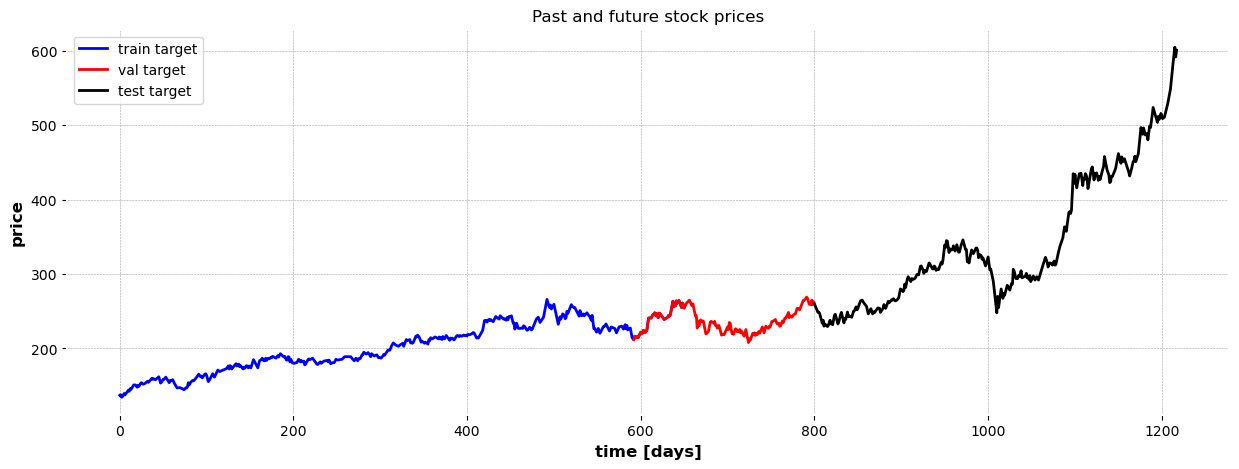

In [38]:
visualize_train_val(X_train, X_val, y_train, y_val, training_set, test_set)

### <font color="purple">We can find a huge difference between training and testing!!!<font>

In [39]:
# Split df into training and testing
training_set, test_set = split_train_test(train_size=800, feature='All')
# Normalize our data
sc, training_set_scaled = normalize(training_set)
X_train, X_val, y_train, y_val = build_dataset(training_set_scaled, time_step=60, feature='All')
X_train.shape, X_val.shape, y_train.shape, y_val.shape, test_set.shape
# training_set[592+148+59]

(740, 60, 6)


((592, 60, 6), (148, 60, 6), (592,), (148,), (418, 6))


### <font color="purple">Build the model<font>

In [40]:
model = Sequential()#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))# Adding the output layer
model.add(Dense(units = 1))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            11400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)               

In [41]:
# Compiling the RNN
start = time.time()
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose=1, validation_data=(X_val,y_val))
end = time.time()

Epoch 1/100
19/19 [==============================] - 1s 61ms/step - loss: 0.0532 - val_loss: 0.0101
Epoch 2/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0135 - val_loss: 0.0049
Epoch 3/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0090 - val_loss: 0.0044
Epoch 4/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0079 - val_loss: 0.0042
Epoch 5/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0081 - val_loss: 0.0046
Epoch 6/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0076 - val_loss: 0.0041
Epoch 7/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0073 - val_loss: 0.0041
Epoch 8/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0087 - val_loss: 0.0053
Epoch 9/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0078 - val_loss: 0.0048
Epoch 10/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0073 - val_loss: 0.0041

Text(0.5, 1.0, 'Training - Loss Function')

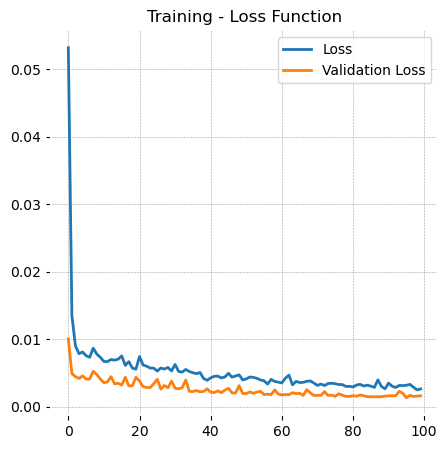

In [42]:
plt.figure(figsize=(5, 5))

plt.subplot()
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

In [43]:
X_test = build_test(feature='All', train_size=800, time_step=60)
predicted_stock_price = model.predict(X_test)
# create a minmax scaler to transform our stock prices back
# The original minmax scaler is 7 dimension, but we only need to transform the price
price_min_max = MinMaxScaler(feature_range=(0,1))
price_min_max.fit_transform(df.iloc[:800, 4:5].values)
predicted_stock_price = price_min_max.inverse_transform(predicted_stock_price)
predicted_stock_price.shape

(418, 1)

### <font color="purple">Visualizing the results<font>

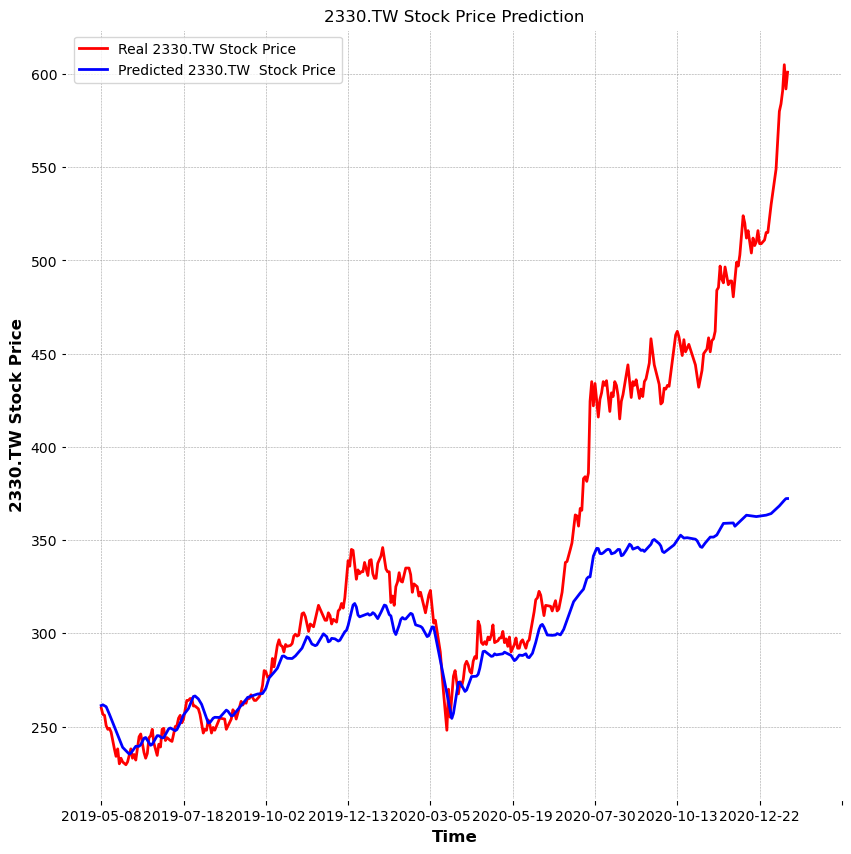

In [44]:
# Visualising the results
plt.figure(figsize=(10, 10))
plt.plot(df.loc[805:, "Date"],df.iloc[800:, 4:5].values, color ="red", label="Real " + ticker + " Stock Price")
plt.plot(df.loc[805:, "Date"],predicted_stock_price, color="blue", label="Predicted " + ticker + "  Stock Price")

plt.xticks(np.arange(0,459,50))
plt.title(ticker+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(ticker+' Stock Price')
plt.legend()
plt.show()

### <font color="purple">以下測試暴跌的極端股票(以2929淘帝-KY為例)<font>

In [45]:
# Change the ticker here
ticker = '2929.TW'
# Read two different formats in order to visulize
df = pd.read_csv(ticker + ".csv")
df = df.dropna()
# Transfer string into datetime object
# remember import datetime.datetime!!
df_plot = copy.deepcopy(df)
df_plot['Date'] = df_plot['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df_plot = df_plot.set_index('Date')

print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1218, 7)


Date       Open       High        Low      Close  Adj Close  \
0  2016-01-18  58.429100  63.343700  58.429100  62.524601  51.421310   
1  2016-01-19  62.797699  66.074097  62.524601  65.254997  53.666840   
2  2016-01-20  64.162804  64.435898  61.432499  61.432499  50.523155   
3  2016-01-21  61.978600  63.343700  61.159500  61.705502  50.747673   
4  2016-01-22  62.797699  63.616798  61.705502  62.797699  51.645916   

      Volume  
0  1560249.0  
1  2030887.0  
2  1527286.0  
3  1298376.0  
4   651935.0

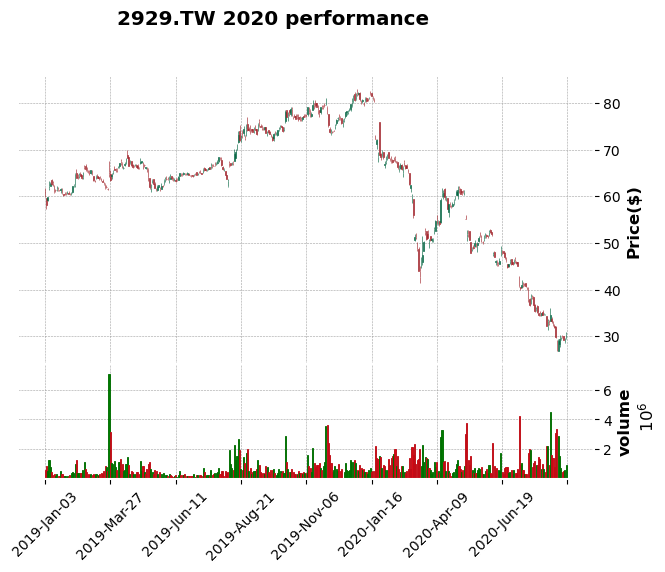

In [46]:
# You can choose the dates here
range_my = pd.date_range(start="2019-01-03", end="2020-08-31")
df_plot = df_plot[df_plot.index.isin(range_my)]
# You can customize the style here
mc = fplt.make_marketcolors(
    up='tab:red', down='tab:green',
    edge='lime',
)
s = fplt.make_mpf_style(marketcolors=mc)

# plot the plot
fplt.plot(
    df_plot,
    type = 'candle',
    style='charles',
    title=ticker+' 2020 performance',
    ylabel='Price($)',
    volume=True,
    ylabel_lower='volume'
)

In [47]:
print("Number of datas in our dataset:", df.shape[0])

Number of datas in our dataset: 1218


In [48]:
# Split df into training and testing
training_set, test_set = split_train_test(train_size=800, feature='Close')
# Normalize our data
sc, training_set_scaled = normalize(training_set)
X_train, X_val, y_train, y_val = build_dataset(training_set_scaled, time_step=60, feature='Close')
X_train.shape, X_val.shape, y_train.shape, y_val.shape, test_set.shape
# training_set[592+148+59]

((592, 60, 1), (148, 60, 1), (592,), (148,), (418, 1))

1158


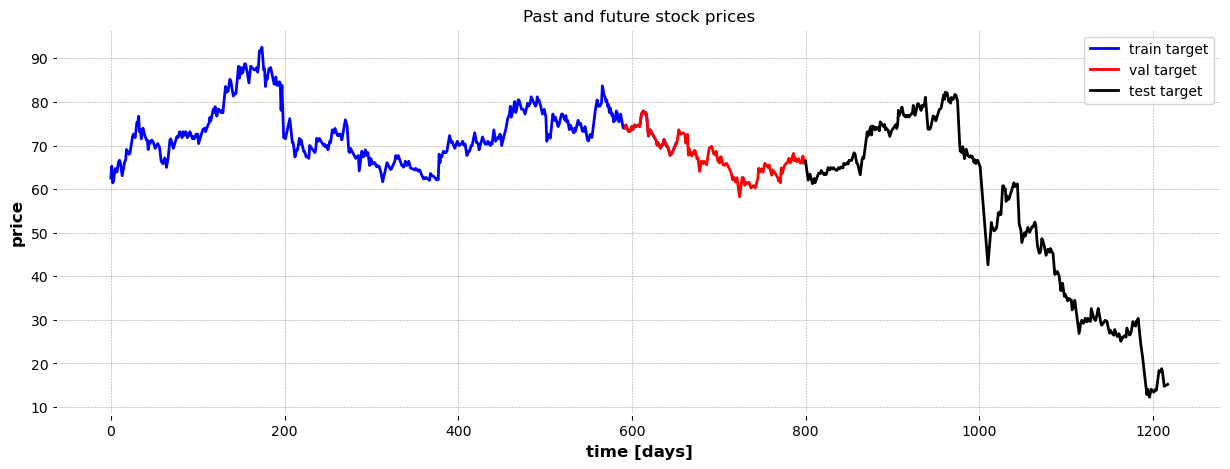

In [49]:
visualize_train_val(X_train, X_val, y_train, y_val, training_set, test_set)

### <font color="purple">We can find there is huge difference between training and testing. There drops sharply in the end!<font>

In [50]:
# Split df into training and testing
training_set, test_set = split_train_test(train_size=800, feature='All')
# Normalize our data
sc, training_set_scaled = normalize(training_set)
X_train, X_val, y_train, y_val = build_dataset(training_set_scaled, time_step=60, feature='All')
X_train.shape, X_val.shape, y_train.shape, y_val.shape, test_set.shape
# training_set[592+148+59]

(740, 60, 6)


((592, 60, 6), (148, 60, 6), (592,), (148,), (418, 6))

### <font color="purple">Build the model<font>

In [51]:
model = Sequential()#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))# Adding the output layer
model.add(Dense(units = 1))

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 60, 50)            11400     
_________________________________________________________________
dropout_16 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_17 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 50)               

In [52]:
# Compiling the RNN
start = time.time()
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose=1, validation_data=(X_val,y_val))
end = time.time()

Epoch 1/100
19/19 [==============================] - 1s 52ms/step - loss: 0.0395 - val_loss: 0.0203
Epoch 2/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0158 - val_loss: 0.0121
Epoch 3/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0108 - val_loss: 0.0086
Epoch 4/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0087 - val_loss: 0.0085
Epoch 5/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0090 - val_loss: 0.0099
Epoch 6/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0088 - val_loss: 0.0069
Epoch 7/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0072 - val_loss: 0.0112
Epoch 8/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0080 - val_loss: 0.0060
Epoch 9/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0069 - val_loss: 0.0061
Epoch 10/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0082 - val_loss: 0.0060

Text(0.5, 1.0, 'Training - Loss Function')

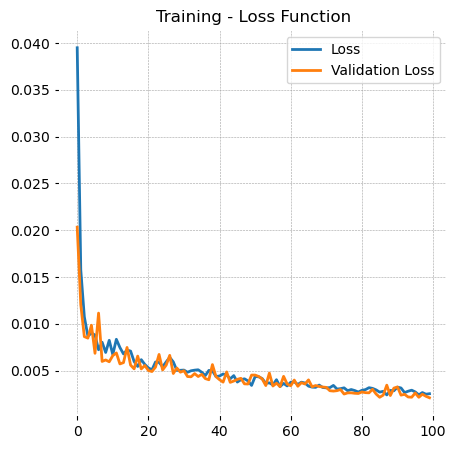

In [53]:
plt.figure(figsize=(5, 5))

plt.subplot()
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

In [54]:
X_test = build_test(feature='All', train_size=800, time_step=60)
predicted_stock_price = model.predict(X_test)
# create a minmax scaler to transform our stock prices back
# The original minmax scaler is 7 dimension, but we only need to transform the price
price_min_max = MinMaxScaler(feature_range=(0,1))
price_min_max.fit_transform(df.iloc[:800, 4:5].values)
predicted_stock_price = price_min_max.inverse_transform(predicted_stock_price)
predicted_stock_price.shape

(418, 1)

### <font color="purple">Visualizing the results<font>

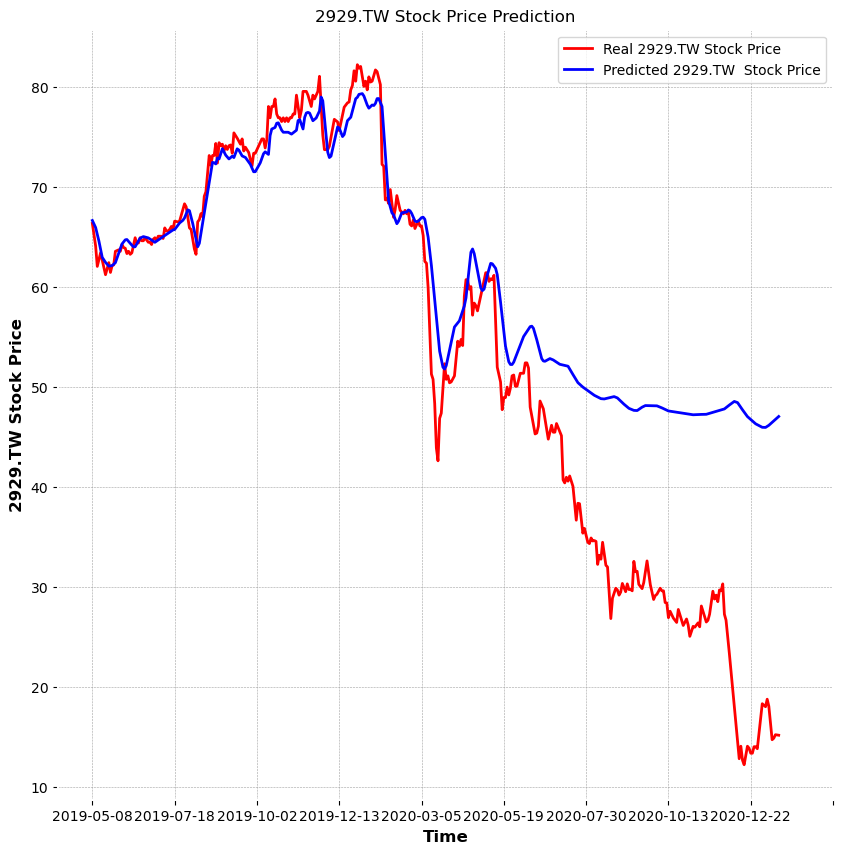

In [55]:
# Visualising the results
plt.figure(figsize=(10, 10))
plt.plot(df.loc[805:, "Date"],df.iloc[800:, 4:5].values, color ="red", label="Real " + ticker + " Stock Price")
plt.plot(df.loc[805:, "Date"],predicted_stock_price, color="blue", label="Predicted " + ticker + "  Stock Price")

plt.xticks(np.arange(0,459,50))
plt.title(ticker+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(ticker+' Stock Price')
plt.legend()
plt.show()

### <font color="purple">We can find an interesting result... The result drops sharply is not predicted well, but it's OK since it's about the company operating conditions(營運狀況)!<font>

### <font color="purple">Using 0~N days data to predict the N+5 day!<font>

In [56]:
ticker = '9911.TW'
# Read two different formats in order to visulize
df = pd.read_csv(ticker + ".csv")
df = df.dropna()
df.head()

Date     Open     High      Low    Close  Adj Close    Volume
0  2016-01-18  21.6875  22.1875  21.2500  22.1875  16.802080  368000.0
1  2016-01-19  22.2500  22.2500  21.8125  22.2500  16.849407  157600.0
2  2016-01-20  22.3750  22.3750  21.8750  22.0000  16.660089  276000.0
3  2016-01-21  22.0000  22.3125  21.9375  21.9375  16.612761  305600.0
4  2016-01-22  22.0625  22.2500  21.9375  22.0625  16.707420  228000.0

In [57]:
# Split df into training and testing
training_set, test_set = split_train_test(train_size=800, feature='All')
# Normalize our data
sc, training_set_scaled = normalize(training_set)
X_train, X_val, y_train, y_val = build_dataset(training_set_scaled, time_step=60, future=5, feature='All')
X_train.shape, X_val.shape, y_train.shape, y_val.shape, test_set.shape
# training_set[592+148+59]

(735, 60, 6)


((588, 60, 6), (147, 60, 6), (588,), (147,), (418, 6))


### <font color="purple">Build the model<font>

In [58]:
model = Sequential()#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))# Adding the output layer
model.add(Dense(units = 1))

# model = Sequential()
# model.add(LSTM(units = 50, input_shape = (X_train.shape[1], 1)))
# model.add(Dense(units = 1))
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 60, 50)            11400     
_________________________________________________________________
dropout_20 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_21 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_22 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)               

In [59]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, epochs = 200, batch_size = 64, verbose=1, validation_data=(X_val,y_val))

 0.0136
Epoch 4/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0161 - val_loss: 0.0087
Epoch 5/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0140 - val_loss: 0.0086
Epoch 6/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0117 - val_loss: 0.0094
Epoch 7/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0115 - val_loss: 0.0082
Epoch 8/200
10/10 [==============================] - 0s 15ms/step - loss: 0.0106 - val_loss: 0.0080
Epoch 9/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0113 - val_loss: 0.0079
Epoch 10/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0112 - val_loss: 0.0090
Epoch 11/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0108 - val_loss: 0.0074
Epoch 12/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0106 - val_loss: 0.0078
Epoch 13/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0102 - val_l

Text(0.5, 1.0, 'Training - Loss Function')

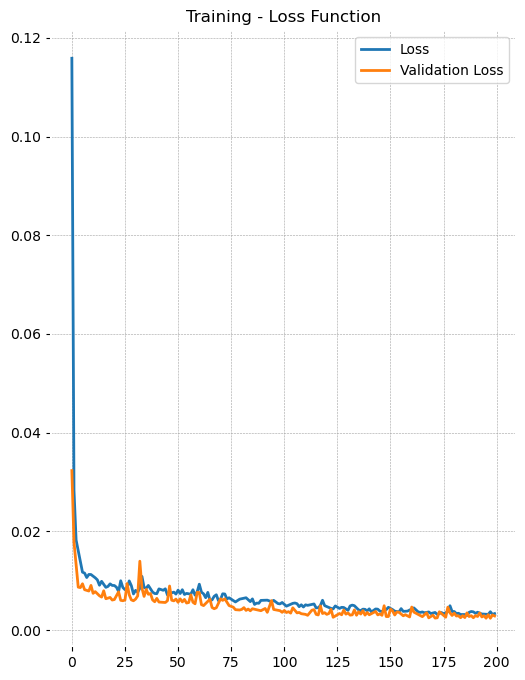

In [60]:
plt.figure(figsize=(6, 8))

plt.subplot()
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')


### <font color="purple">Build the test set<font>

In [61]:
X_test = build_test(feature='All', train_size=800, time_step=60, future=5)
predicted_stock_price = model.predict(X_test)
# create a minmax scaler to transform our stock prices back
# The original minmax scaler is 7 dimension, but we only need to transform the price
price_min_max = MinMaxScaler(feature_range=(0,1))
price_min_max.fit_transform(df.iloc[:800, 4:5].values)
predicted_stock_price = price_min_max.inverse_transform(predicted_stock_price)
predicted_stock_price.shape

(418, 1)


### <font color="purple">Visualizing the results<font>

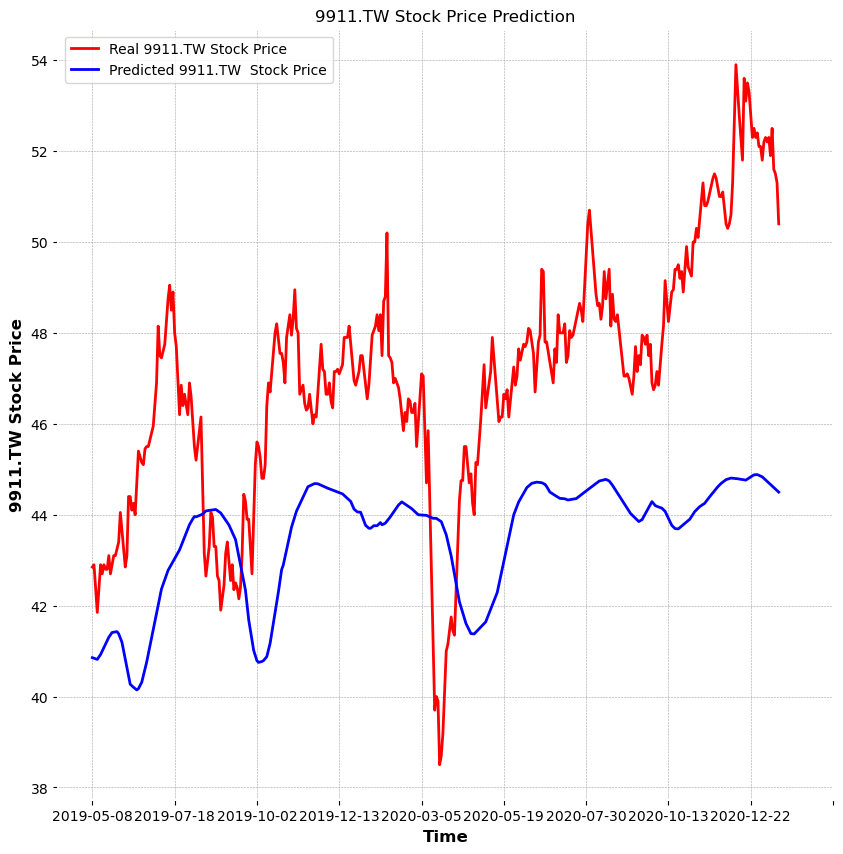

In [62]:
# Visualising the results
plt.figure(figsize=(10, 10))
plt.plot(df.loc[805:, "Date"],df.iloc[800:, 4:5].values, color ="red", label="Real " + ticker + " Stock Price")
plt.plot(df.loc[805:, "Date"],predicted_stock_price, color="blue", label="Predicted " + ticker + "  Stock Price")

plt.xticks(np.arange(0,459,50))
plt.title(ticker+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(ticker+' Stock Price')
plt.legend()
plt.show()

我們可以發現，我們的Model因為預測離未來稍微久一點的時間，預測自然也就沒那麼準了，但趨勢燒唯有符合，雖然delay了幾天xdd

### <font color="purple">Use the data that the LSTM generated as our input data to predict<font>

In [63]:
# Split df into training and testing
training_set, test_set = split_train_test(train_size=800, feature='Close')
# Normalize our data
sc, training_set_scaled = normalize(training_set)
X_train, X_val, y_train, y_val = build_dataset(training_set_scaled, time_step=60, feature='Close')
X_train.shape, X_val.shape, y_train.shape, y_val.shape, test_set.shape

((592, 60, 1), (148, 60, 1), (592,), (148,), (418, 1))

### <font color="purple">Build the model<font>


In [64]:
model = Sequential()#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))# Adding the output layer
model.add(Dense(units = 1))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_24 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_25 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_26 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 50)               

In [65]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose=1, validation_data=(X_val,y_val))

Epoch 1/100
19/19 [==============================] - 1s 52ms/step - loss: 0.0708 - val_loss: 0.0098
Epoch 2/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0161 - val_loss: 0.0073
Epoch 3/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0117 - val_loss: 0.0066
Epoch 4/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0103 - val_loss: 0.0060
Epoch 5/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0108 - val_loss: 0.0058
Epoch 6/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0099 - val_loss: 0.0059
Epoch 7/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0096 - val_loss: 0.0057
Epoch 8/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0089 - val_loss: 0.0050
Epoch 9/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0088 - val_loss: 0.0052
Epoch 10/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0082 - val_loss: 0.0050

Text(0.5, 1.0, 'Training - Loss Function')

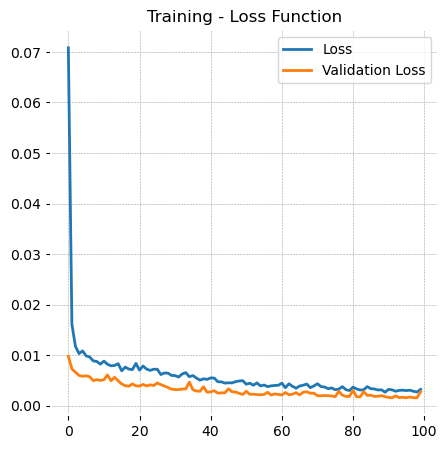

In [66]:

plt.figure(figsize=(5, 5))

plt.subplot()
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')


### <font color="purple">The feedback LSTM<font>

In [67]:
time_step = 60
# This line is for only one feature
X_test = df.iloc[800-time_step:800, 4:5]
# This line is for multuple feature
# X_test = df.iloc[800 - time_step:800, 1:]
X_test = sc.transform(X_test)
X_test = np.array(X_test)
X_test = np.reshape(X_test, newshape=(1, X_test.shape[0], -1))
result = []
for i in range(len(test_set)):
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = np.reshape(predicted_stock_price, (1))
    # print(predicted_stock_price)
    result.append((predicted_stock_price).reshape(1))
    X_test = np.delete(X_test, 0)
    X_test = np.append(X_test, predicted_stock_price)
    X_test = np.reshape(X_test, (1, X_test.shape[0], 1))
result = sc.inverse_transform(result)

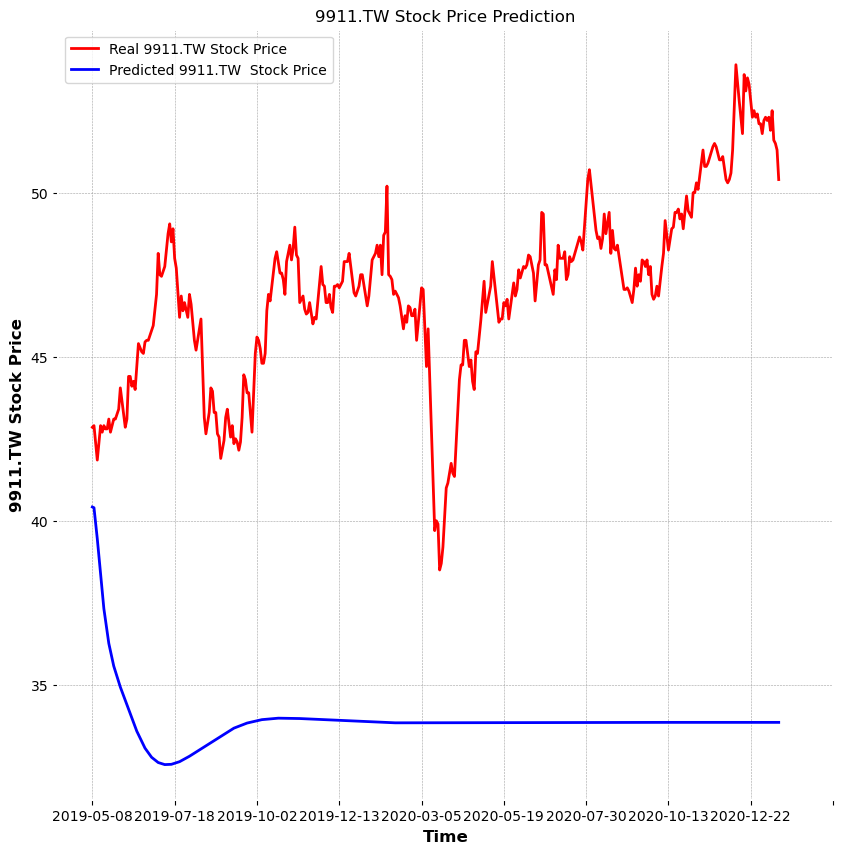

In [68]:
# Visualising the results
plt.figure(figsize=(10, 10))
plt.plot(df.loc[805:, "Date"],df.iloc[800:, 4:5].values, color ="red", label="Real " + ticker + " Stock Price")
plt.plot(df.loc[805:, "Date"],result, color="blue", label="Predicted " + ticker + "  Stock Price")

plt.xticks(np.arange(0,459,50))
plt.title(ticker+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(ticker+' Stock Price')
plt.legend()
plt.show()

預測的線變成一條平滑曲線，趨近值與Model所訓練的Training Data的平均值有關。這檔股票Training data約莫就在36元左右，雖然預測上不准，但說部訂這像爭著36元是一個合理的股價支撐點！

### 使用中華電信的股價
中華電信應該是台股中最平穩的股票了，我們試試看Feedback LSTM會發生什麼事

In [71]:
ticker = '2412.TW'
# Read two different formats in order to visulize
df = pd.read_csv(ticker + ".csv")
df = df.dropna()
df_plot = copy.deepcopy(df)
df_plot['Date'] = df_plot['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df_plot = df_plot.set_index('Date')
df.head()

Date   Open   High    Low  Close  Adj Close     Volume
0  2016-01-18  100.0  101.0   99.5  100.0  80.772842  9992000.0
1  2016-01-19  100.5  101.5  100.5  101.5  81.984444  6781000.0
2  2016-01-20  101.0  102.0  100.0  101.5  81.984444  9095000.0
3  2016-01-21  101.0  101.0  100.0  100.5  81.176704  8261000.0
4  2016-01-22  101.5  101.5  100.0  100.5  81.176704  6304000.0

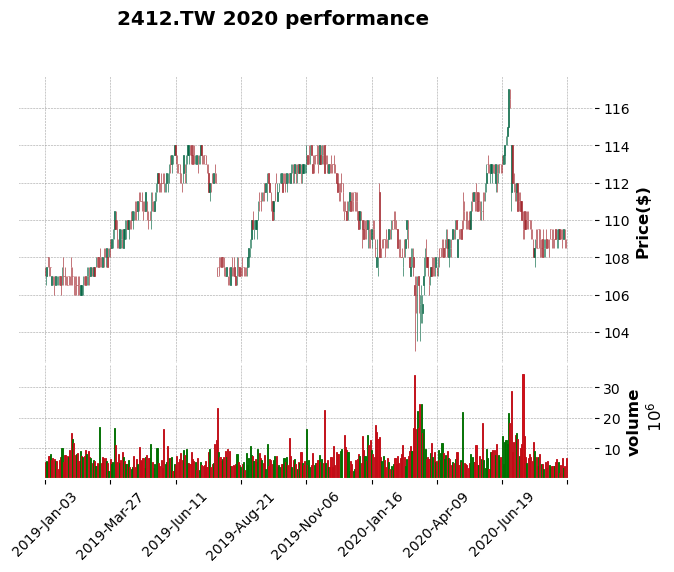

In [72]:
# You can choose the dates here
range_my = pd.date_range(start="2019-01-03", end="2020-08-31")
df_plot = df_plot[df_plot.index.isin(range_my)]
# You can customize the style here
mc = fplt.make_marketcolors(
    up='tab:red', down='tab:green',
    edge='lime',
)
s = fplt.make_mpf_style(marketcolors=mc)

# plot the plot
fplt.plot(
    df_plot,
    type = 'candle',
    style='charles',
    title=ticker+' 2020 performance',
    ylabel='Price($)',
    volume=True,
    ylabel_lower='volume'
)

我們可以發現他的股價震盪大約10%

In [73]:
# Split df into training and testing
training_set, test_set = split_train_test(train_size=800, feature='Close')
# Normalize our data
sc, training_set_scaled = normalize(training_set)
X_train, X_val, y_train, y_val = build_dataset(training_set_scaled, time_step=60, feature='Close')
X_train.shape, X_val.shape, y_train.shape, y_val.shape, test_set.shape

((592, 60, 1), (148, 60, 1), (592,), (148,), (418, 1))

1158


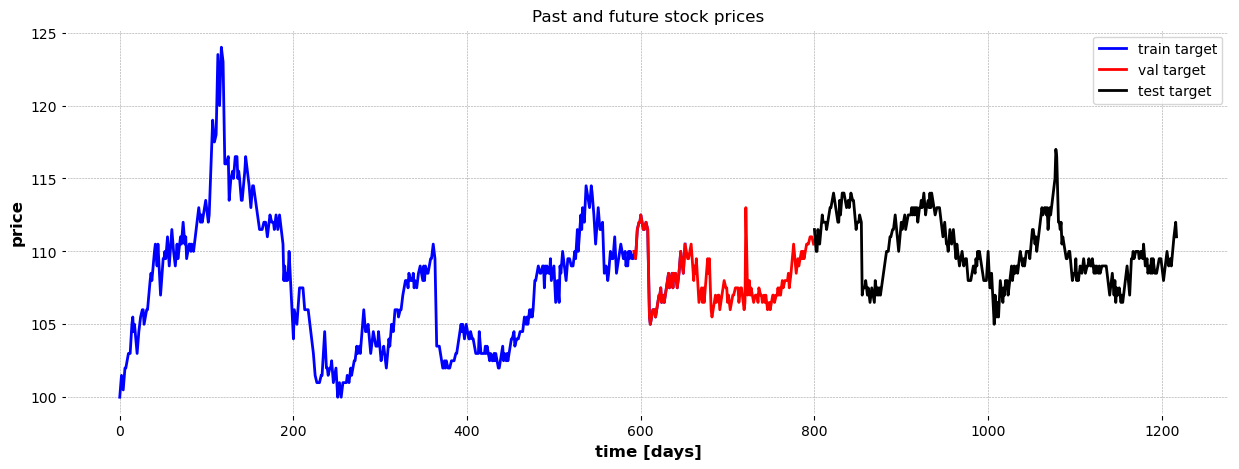

In [74]:
visualize_train_val(X_train, X_val, y_train, y_val, training_set, test_set)

### Build the model

In [75]:
model = Sequential()#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))# Adding the output layer
model.add(Dense(units = 1))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_28 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_29 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_30 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 50)               

In [76]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, epochs = 200, batch_size = 64, verbose=1, validation_data=(X_val,y_val))

 0.0081
Epoch 4/200
10/10 [==============================] - 0s 16ms/step - loss: 0.0103 - val_loss: 0.0077
Epoch 5/200
10/10 [==============================] - 0s 15ms/step - loss: 0.0098 - val_loss: 0.0075
Epoch 6/200
10/10 [==============================] - 0s 15ms/step - loss: 0.0091 - val_loss: 0.0065
Epoch 7/200
10/10 [==============================] - 0s 16ms/step - loss: 0.0089 - val_loss: 0.0068
Epoch 8/200
10/10 [==============================] - 0s 15ms/step - loss: 0.0091 - val_loss: 0.0069
Epoch 9/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0091 - val_loss: 0.0071
Epoch 10/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0090 - val_loss: 0.0056
Epoch 11/200
10/10 [==============================] - 0s 16ms/step - loss: 0.0087 - val_loss: 0.0059
Epoch 12/200
10/10 [==============================] - 0s 15ms/step - loss: 0.0078 - val_loss: 0.0053
Epoch 13/200
10/10 [==============================] - 0s 15ms/step - loss: 0.0072 - val_l

Text(0.5, 1.0, 'Training - Loss Function')

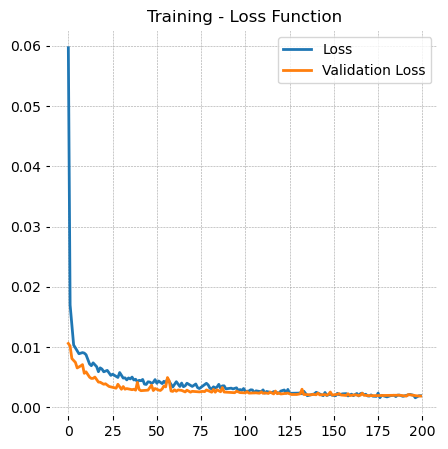

In [77]:

plt.figure(figsize=(5, 5))

plt.subplot()
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

In [78]:
time_step = 60
# This line is for only one feature
X_test = df.iloc[800-time_step:800, 4:5]
# This line is for multuple feature
# X_test = df.iloc[800 - time_step:800, 1:]
X_test = sc.transform(X_test)
X_test = np.array(X_test)
X_test = np.reshape(X_test, newshape=(1, X_test.shape[0], -1))
result = []
for i in range(len(test_set)):
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = np.reshape(predicted_stock_price, (1))
    # print(predicted_stock_price)
    result.append((predicted_stock_price).reshape(1))
    X_test = np.delete(X_test, 0)
    X_test = np.append(X_test, predicted_stock_price)
    X_test = np.reshape(X_test, (1, X_test.shape[0], 1))
result = sc.inverse_transform(result)


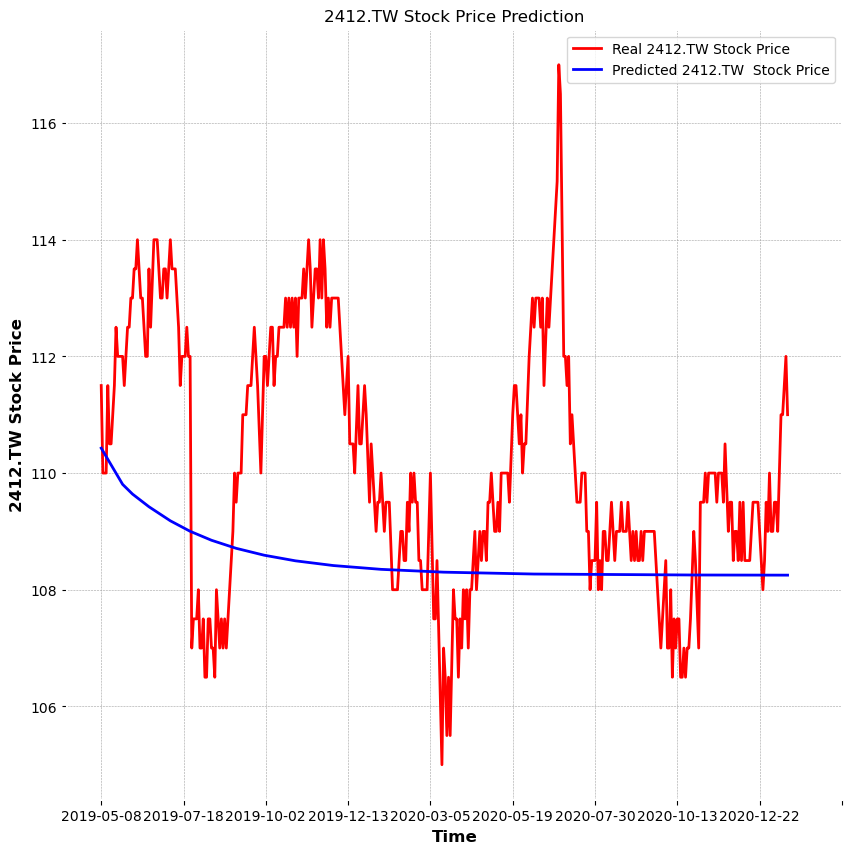

In [79]:
# Visualising the results
plt.figure(figsize=(10, 10))
plt.plot(df.loc[805:, "Date"],df.iloc[800:, 4:5].values, color ="red", label="Real " + ticker + " Stock Price")
plt.plot(df.loc[805:, "Date"],result, color="blue", label="Predicted " + ticker + "  Stock Price")

plt.xticks(np.arange(0,459,50))
plt.title(ticker+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(ticker+' Stock Price')
plt.legend()
plt.show()

我們再次看到股價趨近於一條直線，很有可能就是前面提到的股價最低支撐點！！！但實務上是沒辦法這樣來判斷的。

### Discussion & Conclusion

本次Final Project嘗試了RNN和LSTM的實作<br>
由於我們這組都對股票很有興趣，因此期望能夠運用機器學習的方法來進行「股價預測」，於是挑選了這個主題<br>
整體而言，我們可以得到幾個結論<br>
1. 使用all features能夠比只使用收盤價(Close)達到更好的效果，但單獨使用收盤價就已經能預測出趨勢了<br>
2. 我們的設定下LSTM因為架構較RNN複雜，但實際Training時比較快，可能跟他的Gradient flow有關，也有可能是LSTM被開發者Fine tune過所以跑得比較快。<br>
3. 就效果而言LSTM可以得到較接近ground truth的結果<br>
4. 對於股價較平穩的股票能夠較準確地去預測，但若遇到比較極端的狀況(暴漲或暴跌)，則會在特殊的區間失準<br>
5. 倘若嘗試預測更遙遠(即N+很多天)的股價，則大趨勢是對的，但實際價格則不可行<br>
6. 生成股價data，並把data重新餵進model進行更遙遠的預測是不可行的<br>

而我認為最重要的關鍵是，在比較使用features多寡的地方，我們可以發現使用所有feature的情況會與股價較為貼近，此種方法正是股票技巧上耳熟能詳的「技術分析」，透過K棒以及成交量來判斷股票走勢，由此可見前日開盤、收盤、低價、高價，以及成交量都對股市的變化有相當的影響，而若僅僅只靠收盤價進行預測，則資訊可能會不足以能讓model被準確訓練到<br>

總結，藉由這次Project，可以讓我們更加熟悉、了解如何使用RNN, LSTM這類的model進行有關時間序列的訓練<br>
最後，花費大量時間training，並結合我們都有興趣的主題，且最後得到還不錯的成效，成就感十足！<br>

### 修課心得

經過這一學期的修課，可以說是幫助我們在機器學習領域打底，加上本身對這領域就懷有高度興趣，專題的部分也選擇了相關的老師。<br>
從學期初基本的SVM, KNN，到後來的DNN, CNN，以及最後的RNN，對ML的領域可以說是經過這學期的課程更廣的去瞭解了！<br>
而每次作業的部分，都花費不少心力琢磨，因為希望能夠訓練出優質的東西並且把效果呈現給觀賞這份報告的人，所以也花了不少時間在研究各種圖表的用法<br>
以往Python只會被我們拿來作為解題的語言使用，由於先前修過Python的基礎課程，因此對於Python早已有概觀的認識<br>
但經過這學期的各種實作後，可說是多學到了很多東西<br>
例如：前半學期主要著墨在Scikit-learn套件的用法，後半學期則是碰到一些深度學習的東西(CNN)，因此接觸了tensorflow的用法<br>
而最後RNN和LSTM這部分由於作業沒有使用有點可惜，但幸好我們的project想做的題目蠻適合利用RNN這類來處理，因為是時間序列的預測問題！<br>
總而言之，雖然這門課沒有碰到太多過於艱澀的數學推導(畢竟機器學習領域背後都有十分艱難的數學...)，但實作上我認為自己是收穫頗豐<br>
從全局的角度來切入機器學習領域，如此一來之後要深入往哪個方面去鑽研也會比較快上手<br>
最後，感謝教授這學期的教學，以及助教這一學期的作業批改！<br>